# Logistic Regression Homework

In this dataset, we'll be looking at the [Palmer Penguin](https://allisonhorst.github.io/palmerpenguins/) dataset. This dataset is measurements of a few hundred penguins on three islands off of Antarctica. There are also three species of penguins.

It can be difficult to determine the sex of certain species of penguins visually: the males and females of some species look extremely similar. In fact, for the Galapágos penguin, the most successful method is a DNA test.

So, here we're going to see if we can use a logistic regression model to predict the sex of the penguins on these islands.

In [ ]:
# Basic working with data libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Library including linear/logistic regression
import statsmodels.api as sm

from statsmodels.api import *

The following code loads in the data.

In [ ]:
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

For some species of penguins, the size of the bill (length and depth) is a reasonably reliable method for telling the sexes apart. The males are slightly larger.

Make a detailed plot of the bill length and depth of penguins. Does this appear contain enough information to determine sex for these penguin species?

(Hint: I recommend using the `style=` named argument to tell the species apart).

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

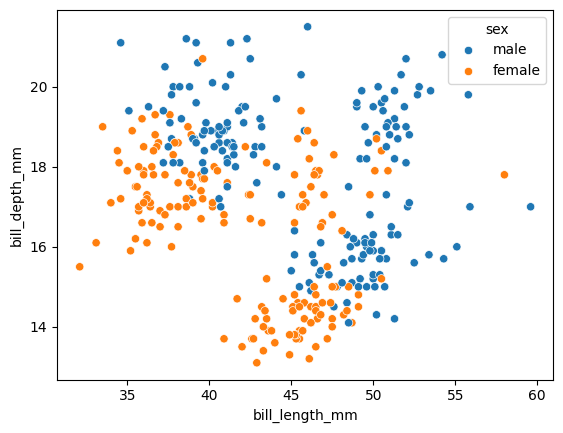

In [ ]:
sns.scatterplot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="sex")

Ans: Id say there definitely is clustering here between male penguins and female penguins, so you definitely could use this to help determine sex, but it's not enough information to determine sex with absolute certainty since there is some mixing between the two sex

Using all other reasonable columns in the dataset, fit a logistic model predicting whether a penguin is male and female.

In [ ]:
penguins = penguins.dropna()
X = penguins[['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']]

#might be stupid, but there could be more of one sex on different islands, or more of one sex
#depending on the species
y = (penguins["sex"] == "male").astype("float32") #male is 1, female is 0
X = pd.get_dummies(X).astype("float32")


In [ ]:
X

,const,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,1.0,39.099998,18.700001,181.0,3750.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,39.500000,17.400000,186.0,3800.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,40.299999,18.000000,195.0,3250.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,36.700001,19.299999,193.0,3450.0,1.0,0.0,0.0,0.0,0.0,1.0
5,1.0,39.299999,20.600000,190.0,3650.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
339,1.0,55.799999,19.799999,207.0,4000.0,0.0,1.0,0.0,0.0,1.0,0.0
340,1.0,43.500000,18.100000,202.0,3400.0,0.0,1.0,0.0,0.0,1.0,0.0
341,1.0,49.599998,18.200001,193.0,3775.0,0.0,1.0,0.0,0.0,1.0,0.0
342,1.0,50.799999,19.000000,210.0,4100.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X = sm.tools.tools.add_constant(X)

model = sm.Logit(y, X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.189260
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                    sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      324
Method:                           MLE   Df Model:                            8
Date:                Tue, 12 Nov 2024   Pseudo R-squ.:                  0.7269
Time:                        14:26:51   Log-Likelihood:                -63.024
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 1.090e-67
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -51.4288   3.41e+07  -1.51e-06      1.000   -6.68e+07    6.68e+07
bill_le

Which variables in the dataset are statistically significant to predicting sex? Name all of them.

In [ ]:
#Bill Length, bill depth, body mass in grams

If I compare two penguins A and B who are otherwise identical, but A weighs more, which penguin is more likely to be male? Explain how the model's output tells you this.

In [ ]:
#Penguin A is, our coefficient indicates this by being positive, indicating that as
#it increases, theres a higher chance of y being male (since male is 1 and female is 0)

Using `pandas`, determine how many male and female penguins are in the dataset of each species.

In [ ]:
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
#adding back potentially dropped rows
penguins["sex"].value_counts()

,count
sex,
male,168
female,165


Looking at the logistic regression output, interpret the `species_Chinstrap` parameter. What does it mean for predictions?

Give the simple interpretation, and also reconcile this with the gender counts and your graph above.

In [ ]:
#It is not predictive of gender since its P value is so high, this likely means
#that theres a pretty even gender split amongst each species, like theres a similar
#amount of male chinstrap penguins as there is female

How accurate is this model? Compare its accuracy to the null accuracy.

In [ ]:
#Our accuracy
confusion = model.pred_table(threshold=0.5)

confusion.trace()/confusion.sum()*100

92.49249249249249

In [ ]:
#Null accuracy
y.value_counts(normalize=True)

,proportion
sex,
1.0,0.504505
0.0,0.495495


This model is about 92.5% accurate, which is more than the null accuracy's 50.5%

Accuracy always matters in *context*. Imagine that these penguins are endangered (don't worry, these penguins are safe), and we wanted to take about a dozen or so from the wild to breed in captivity. Is this accuracy high enough for this purpose?

In [ ]:
#Guessing we'd be trying to get an even split of male to female penguins (6 to 6),
#this would mean we have a 92 percent chance of getting this split when picking penguins

#The chances of not getting a single female (the slightly less common gender) would be
#around
total = 1
a = 168
b = 333
for i in range(0,12):
  a = a - i
  b = b - i
  total = total * (a/b)

total

#This is the chance from choosing AT RANDOM, using our model the chance of this happening would
#be even smaller, so I feel it would be a high enough accuracy for this purpose considering
#the chance of not getting a single penguin of opposite gender is so small

#Then again, I don't know how endangered species laws/regulations/requirements work, so
#you would likely need a more even split of male to female, and that would mean we stick closer
#to this 92% accuracy number our model gives us, which that may be high enough but depending
#on endangered species laws I can't say for sure

9.430683674667197e-05

Rather than doing this for penguins, we could build a similar model for humans to predict whether someone is male or female, using height, weight, and other physical measurements. Name a social or political issue that would arise from trying to do something like this.

In [ ]:
#If we have to take measurements of people, this would be physically intrusive, and
#requiring people to give these measurements in order to label them as a certain gender
#would probably infringe on their right to privacy.